In [2]:
%matplotlib inline  
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from pylab import*

In [3]:
df = pd.read_csv('featuresdf.csv')

These are the top 5 songs of 2017

In [4]:
#Songs are already in order, choose top 5 songs from 2017
df.head(5)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [5]:
popular_artist = df.groupby('artists').count()
popular_artist= popular_artist.sort_values(by='id', ascending=False).head(2)
popular_artist
print("The top artists of 2017 with the most songs on the chart (tied): ", popular_artist['id'])

The top artists of 2017 with the most songs on the chart (tied):  artists
Ed Sheeran          4
The Chainsmokers    4
Name: id, dtype: int64


What do these artists have in common that make their music high on the charts?
We will explore: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature

In [6]:
top_dance = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
top_dance = pd.DataFrame(df, columns=['artists', 'danceability']).sort_values(by='danceability', ascending=False).head(10)
top_dance

,artists,danceability
48,Migos,0.927
51,Drake,0.927
5,Kendrick Lamar,0.904
42,Calvin Harris,0.893
94,21 Savage,0.884
62,Jax Jones,0.876
38,Liam Payne,0.869
23,Shawn Mendes,0.857
91,Rita Ora,0.855
8,Bruno Mars,0.853


As we can see through the analysis of danceability, none of the top 2 songs are present, neither are ane of the top 5 (as we can tell by the identifier on the far left). Therefore, Danceability did not have an impact on getting a song to the top of 2017's most played tracks. Let's take a look at the top energetic songs in 2017 to see if they correlate with standing on the chart.

In [7]:
tenergy = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
tenergy = pd.DataFrame(df, columns=['artists', 'energy']).sort_values(by='energy', ascending=False).head(10)
tenergy

,artists,energy
77,Steve Aoki,0.932
26,Ed Sheeran,0.876
56,Maggie Lindemann,0.868
68,Wisin,0.864
96,The Chainsmokers,0.859
41,Starley,0.843
81,CNCO,0.838
50,Martin Jensen,0.836
17,Ed Sheeran,0.834
55,Enrique Iglesias,0.823


High energy songs are not correlated to the top five songs of 2017. The top energetic songs of 2017 range from 18 - 97. Let's see how key impacts our results:

In [8]:
key = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
key = pd.DataFrame(df, columns=['artists', 'key']).sort_values(by='key', ascending=False).head(10)
key

,artists,key
99,ZAYN,11.0
57,Demi Lovato,11.0
48,Migos,11.0
3,The Chainsmokers,11.0
62,Jax Jones,11.0
96,The Chainsmokers,11.0
36,Drake,11.0
43,Jonas Blue,11.0
90,Alok,11.0
10,Lil Uzi Vert,11.0


Since most of the results are tied for 11.0 in range, let's expand our results to the top 20. We will note that only one song from the top 5 is in the results for high key.

In [9]:
key = pd.DataFrame(df, columns=['artists', 'key']).sort_values(by='key', ascending=False).head(20)
key

,artists,key
99,ZAYN,11.0
57,Demi Lovato,11.0
48,Migos,11.0
3,The Chainsmokers,11.0
62,Jax Jones,11.0
96,The Chainsmokers,11.0
36,Drake,11.0
43,Jonas Blue,11.0
90,Alok,11.0
10,Lil Uzi Vert,11.0


Searching through the top 20 we see that key does not have an impact on the placement of a song in the top 5 or higher end of the data. I want to explore all of the options to see if there is correlation amongst the top 5.

In [10]:
speech = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
speech = pd.DataFrame(df, columns=['artists', 'speechiness']).sort_values(by='speechiness', ascending=False).head(10)
speech

,artists,speechiness
14,Future,0.431
46,Khalid,0.425
51,Drake,0.420
66,Alessia Cara,0.370
60,Kendrick Lamar,0.365
94,21 Savage,0.351
45,KYLE,0.289
31,The Weeknd,0.282
85,Lauv,0.253
83,Ariana Grande,0.247


In [11]:
aco = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
aco = pd.DataFrame(df, columns=['artists', 'acousticness']).sort_values(by='acousticness', ascending=False).head(10)
aco

,artists,acousticness
22,James Arthur,0.695
76,Sam Smith,0.652
90,Alok,0.586
0,Ed Sheeran,0.581
35,Logic,0.570
85,Lauv,0.535
33,Calvin Harris,0.498
97,Sam Hunt,0.463
30,The Weeknd,0.427
28,The Chainsmokers,0.414


Text(0.5,0,'Artist Position on Top Tracks')

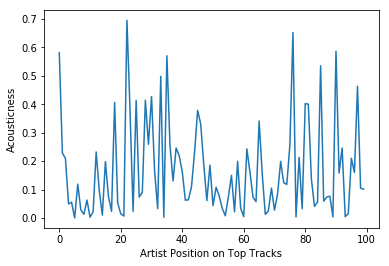

In [27]:
df['acousticness'].plot()
plt.ylabel('Acousticness')
plt.xlabel('Artist Position on Top Tracks')

In [29]:
ins = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
ins = pd.DataFrame(df, columns=['artists', 'instrumentalness']).sort_values(by='instrumentalness', ascending=False).head(10)
ins

,artists,instrumentalness
21,Imagine Dragons,0.210000
56,Maggie Lindemann,0.132000
36,Drake,0.085000
14,Future,0.021900
7,French Montana,0.010100
58,Childish Gambino,0.006110
96,The Chainsmokers,0.004660
54,Drake,0.004230
90,Alok,0.003660
41,Starley,0.000752


Text(0.5,0,'Artist Position on Top Tracks')

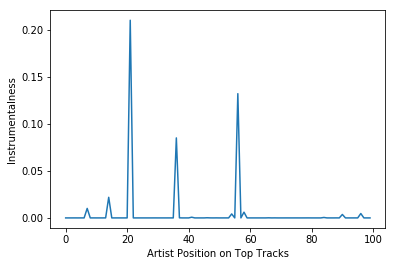

In [31]:
df['instrumentalness'].plot()
plt.ylabel('Instrumentalness')
plt.xlabel('Artist Position on Top Tracks')

In [13]:
live = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
live = pd.DataFrame(df, columns=['artists', 'liveness']).sort_values(by='liveness', ascending=False).head(10)
live

,artists,liveness
84,Zion & Lennox,0.440
44,Maluma,0.351
54,Drake,0.351
86,Martin Garrix,0.337
26,Ed Sheeran,0.327
9,ZAYN,0.325
89,The Vamps,0.323
93,Justin Bieber,0.306
83,Ariana Grande,0.292
57,Demi Lovato,0.290


In [14]:
tempo = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
tempo = pd.DataFrame(df, columns=['artists', 'tempo']).sort_values(by='tempo', ascending=False).head(10)
tempo

,artists,tempo
52,DJ Snake,199.864
63,Katy Perry,189.798
31,The Weeknd,186.054
99,ZAYN,180.043
61,Nicky Jam,179.910
66,Alessia Cara,179.666
2,Luis Fonsi,177.833
21,Imagine Dragons,167.880
58,Childish Gambino,160.083
96,The Chainsmokers,159.797


In [15]:
time = df.groupby('artists').count().sort_values(by='id', ascending=False).head(2)
time = pd.DataFrame(df, columns=['artists', 'duration_ms']).sort_values(by='duration_ms', ascending=False).head(10)
time

,artists,duration_ms
48,Migos,343150.0
70,Harry Styles,340707.0
58,Childish Gambino,326933.0
36,Drake,298941.0
4,DJ Khaled,288600.0
92,Chris Jeday,271080.0
30,The Weeknd,269187.0
40,Ed Sheeran,263400.0
17,Ed Sheeran,261154.0
45,KYLE,253107.0


Throughout the analysis of the available resources there was no clear correlation of the top 5, or even top 10 songs, in terms of danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature

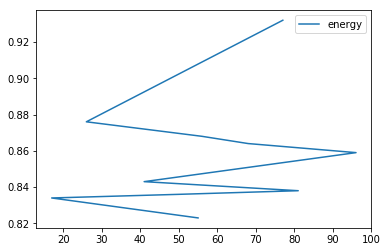

In [18]:
tenergy.plot()

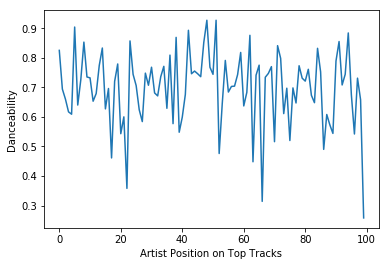

In [26]:
df['danceability'].plot()
plt.ylabel('Danceability')
plt.xlabel('Artist Position on Top Tracks')
plt.savefig('dancing.png')